# Disease Diagnosis Model Development
This notebook demonstrates the process of building and evaluating various machine learning models for predicting diseases based on symptom data. It includes data preprocessing, feature engineering, model training, hyperparameter tuning, and performance evaluation.


## Importing Libraries
We start by importing the necessary libraries for data analysis, visualization, and machine learning.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

## Loading the Data
The data consists of training and testing datasets for disease diagnosis. We load the datasets and inspect their structure.


In [2]:
data1 = pd.read_csv('../datasets/disease_diagnosis_dataset_1/Testing.csv')
data2 = pd.read_csv('../datasets/disease_diagnosis_dataset_1/Training.csv')

## Initial Data Analysis
In this section, we perform the following:
- Check the shape of the datasets.
- Inspect the first few rows of the data.
- Identify and drop unnecessary columns.
- Combine the datasets for unified processing.


In [3]:
data1.shape

(42, 133)

In [4]:
data2.shape

(4920, 134)

In [5]:
data1.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [6]:
data2.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [7]:
data2.drop(columns=['Unnamed: 133'],inplace=True)

In [8]:
#checking for any extra features and labels
data1.columns[data1.columns!=data2.columns]

Index([], dtype='object')

In [9]:
data = pd.concat([data1,data2], axis = 0)

## Data Cleaning
We clean the data by:
- Removing duplicates.
- Checking for and handling missing values.


In [10]:

data = data.drop_duplicates()

In [11]:
data.isnull().sum().sum()

0

In [12]:
data.shape

(305, 133)

## Exploratory Data Analysis (EDA)
### Class Distribution
We visualize the distribution of the target variable (`prognosis`) to ensure sufficient representation for each class.

### Correlation Analysis
A heatmap is used to analyze the correlation between features, which can help identify redundant features.


In [13]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.00000,305.000000,...,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,0.137705,0.140984,0.013115,0.039344,0.013115,0.173770,0.150820,0.036066,0.04918,0.019672,...,0.013115,0.013115,0.013115,0.022951,0.019672,0.019672,0.019672,0.016393,0.019672,0.016393
std,0.345156,0.348577,0.113953,0.194732,0.113953,0.379535,0.358461,0.186760,0.21660,0.139099,...,0.113953,0.113953,0.113953,0.149993,0.139099,0.139099,0.139099,0.127192,0.139099,0.127192
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 0 to 407
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 319.3+ KB


C:\Users\krish\AppData\Local\Temp\ipykernel_75816\6842173.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='prognosis', data=data, palette='pastel', edgecolor='black')


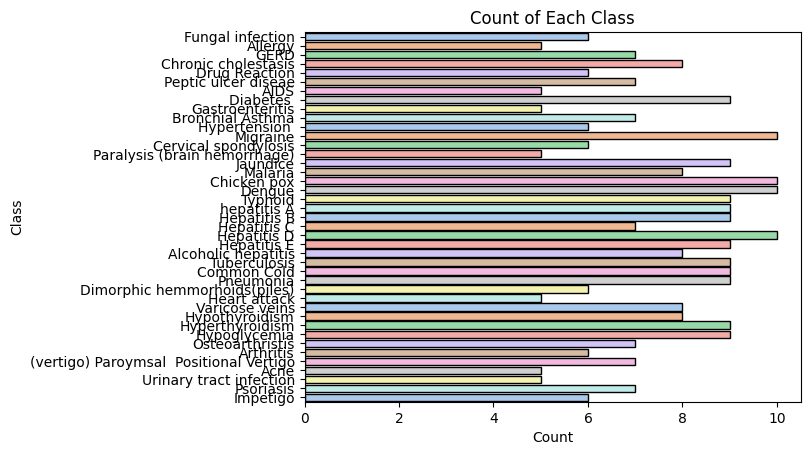

In [15]:
sns.countplot(y='prognosis', data=data, palette='pastel', edgecolor='black')
plt.title('Count of Each Class')
plt.xlabel('Count')
plt.ylabel('Class')
plt.show()

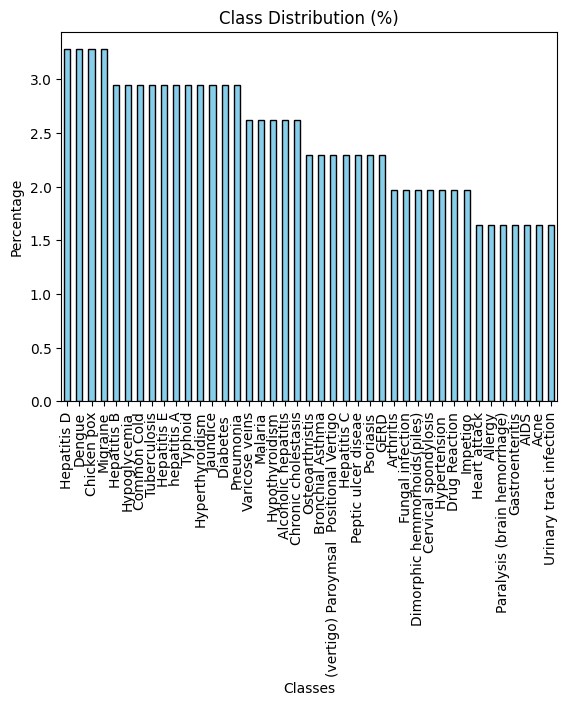

In [16]:
class_counts = data['prognosis'].value_counts(normalize=True) * 100
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Class Distribution (%)")
plt.ylabel("Percentage")
plt.xlabel("Classes")
plt.show()

## Encoding the Target Variable
The target variable (`prognosis`) is encoded using `LabelEncoder` to convert categorical values into numerical labels suitable for machine learning.


In [17]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable dynamically
label_encoder = LabelEncoder()
data['prognosis'] = label_encoder.fit_transform(data['prognosis'])

# View class labels
class_labels = label_encoder.classes_
print(f"Class Labels: {class_labels}")

Class Labels: ['(vertigo) Paroymsal  Positional Vertigo' 'AIDS' 'Acne'
 'Alcoholic hepatitis' 'Allergy' 'Arthritis' 'Bronchial Asthma'
 'Cervical spondylosis' 'Chicken pox' 'Chronic cholestasis' 'Common Cold'
 'Dengue' 'Diabetes ' 'Dimorphic hemmorhoids(piles)' 'Drug Reaction'
 'Fungal infection' 'GERD' 'Gastroenteritis' 'Heart attack' 'Hepatitis B'
 'Hepatitis C' 'Hepatitis D' 'Hepatitis E' 'Hypertension '
 'Hyperthyroidism' 'Hypoglycemia' 'Hypothyroidism' 'Impetigo' 'Jaundice'
 'Malaria' 'Migraine' 'Osteoarthristis' 'Paralysis (brain hemorrhage)'
 'Peptic ulcer diseae' 'Pneumonia' 'Psoriasis' 'Tuberculosis' 'Typhoid'
 'Urinary tract infection' 'Varicose veins' 'hepatitis A']


In [18]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,16
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,14


## Splitting the Data
The dataset is split into training and testing sets (80% training, 20% testing). The `train_test_split` method ensures random and stratified splitting.


In [19]:
from sklearn.model_selection import train_test_split
x = data.drop(columns="prognosis")
y = data['prognosis']

# Split into training and test sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Model Development
### Base Models
We train the following basic models:
- Logistic Regression
- Decision Tree
- K-Nearest Neighbors

### Powerful Models
Advanced models are trained, including:
- Support Vector Machines (SVM)
- Random Forest
- Gradient Boosting
- XGBoost, LightGBM, and CatBoost

### Ensemble Methods
We include ensemble methods such as Bagging and AdaBoost for improved performance.

### Probabilistic Models
We also use Naive Bayes as a probabilistic classifier.


In [20]:
#Base Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#Powerful Models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
#Ensemble Methods
from sklearn.ensemble import BaggingClassifier, VotingClassifier, AdaBoostClassifier
#Probabilistic Models
from sklearn.naive_bayes import GaussianNB

In [21]:
# Base Models
base_models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

# Powerful Models
powerful_models = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss'),
    "LightGBM": lgb.LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

# Ensemble Methods
ensemble_methods = {
    "Bagging Classifier": BaggingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

# Probabilistic Models
probabilistic_models = {
    "Naive Bayes": GaussianNB()
}

# Combine all models
all_models = {**base_models, **powerful_models, **ensemble_methods, **probabilistic_models}


## Performance Evaluation
We evaluate the models using:
- Accuracy
- Precision
- Recall
- F1-Score

The results are stored in a dataframe and visualized using bar plots for comparison.


In [22]:
# Dictionary to store model performance
performance_metrics = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-Score": []}

for model_name, model in all_models.items():
    # Use scaled data for models that benefit from scaling
    if model_name in ["Logistic Regression", "SVM", "KNN", "XGBoost", "LightGBM", "CatBoost", "Naive Bayes"]:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
    else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append to dictionary
    performance_metrics["Model"].append(model_name)
    performance_metrics["Accuracy"].append(accuracy)
    performance_metrics["Precision"].append(precision)
    performance_metrics["Recall"].append(recall)
    performance_metrics["F1-Score"].append(f1)


d:\FinalYearProject-Krish\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\FinalYearProject-Krish\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\FinalYearProject-Krish\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\FinalYearProject-Krish\venv

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 54
[LightGBM] [Info] Number of data points in the train set: 244, number of used features: 27
[LightGBM] [Info] Start training from score -4.110874
[LightGBM] [Info] Start training from score -4.398556
[LightGBM] [Info] Start training from score -4.398556
[LightGBM] [Info] Start training from score -3.551258
[LightGBM] [Info] Start training from score -4.110874
[LightGBM] [Info] Start training from score -3.705409
[LightGBM] [Info] Start training from score -4.110874
[LightGBM] [Info] Start training from score -3.887730
[LightGBM] [Info] Start training from score -3.299944
[LightGBM] [Info] Start training from score -3.705409
[LightGBM] [Info] Start trainin

d:\FinalYearProject-Krish\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\FinalYearProject-Krish\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\FinalYearProject-Krish\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\FinalYearProject-Krish\venv

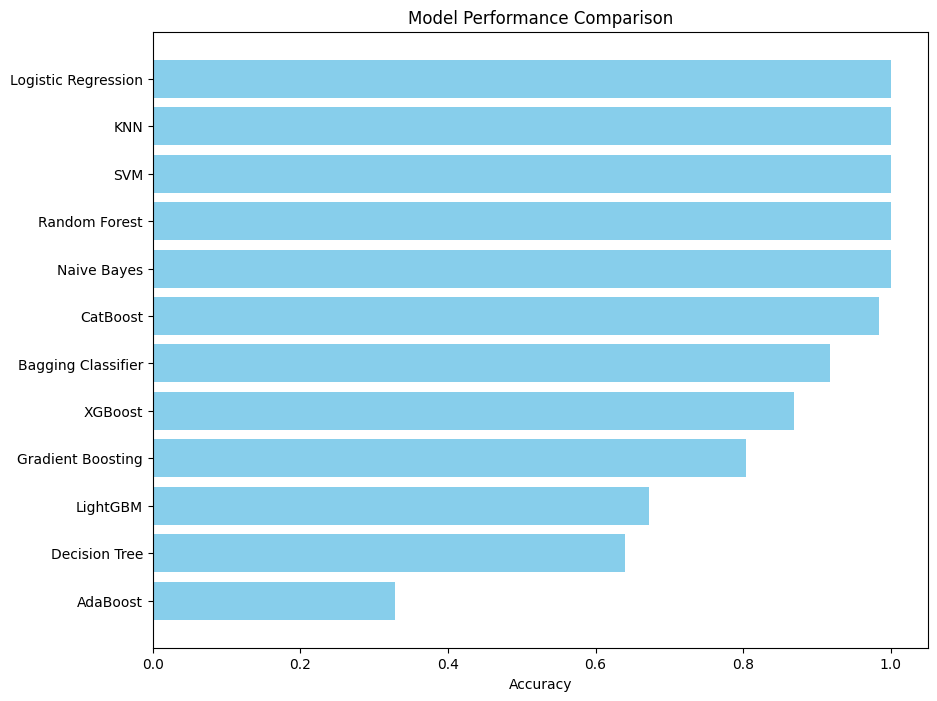

In [23]:
# Convert dictionary to DataFrame
performance_df = pd.DataFrame(performance_metrics)

# Sort models by accuracy for better visualization
performance_df = performance_df.sort_values(by="Accuracy", ascending=False)

# Plot performance metrics
plt.figure(figsize=(10, 8))
plt.barh(performance_df["Model"], performance_df["Accuracy"], color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Performance Comparison")
plt.gca().invert_yaxis()  # Invert y-axis to show the best model on top
plt.show()



In [24]:
pd.DataFrame(performance_metrics)

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000
1,Decision Tree,0.639344,0.778689,0.639344,0.676503
2,KNN,1.000000,1.000000,1.000000,1.000000
3,SVM,1.000000,1.000000,1.000000,1.000000
4,Random Forest,1.000000,1.000000,1.000000,1.000000
5,Gradient Boosting,0.803279,0.867942,0.803279,0.810830
6,XGBoost,0.868852,0.892896,0.868852,0.867486
7,LightGBM,0.672131,0.755464,0.672131,0.692428
8,CatBoost,0.983607,0.991803,0.983607,0.983607
9,Bagging Classifier,0.918033,0.956284,0.918033,0.928962


## Feature Selection
We use Recursive Feature Elimination (RFE) with a Random Forest classifier to identify the top 10 most important features for predicting diseases.


Since Random Forest is an ensemble-based algorithm that naturally provides insights into feature importance we choose this particular model for evaluation of important features

In [25]:
from sklearn.feature_selection import RFE
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=10)  # Select top 10 features
rfe.fit(x, y)
selected_features = x.columns[rfe.support_]
print(f"Selected Features: {selected_features}")


Selected Features: Index(['itching', 'vomiting', 'fatigue', 'high_fever', 'sweating', 'headache',
       'nausea', 'loss_of_appetite', 'abdominal_pain', 'irritability'],
      dtype='object')


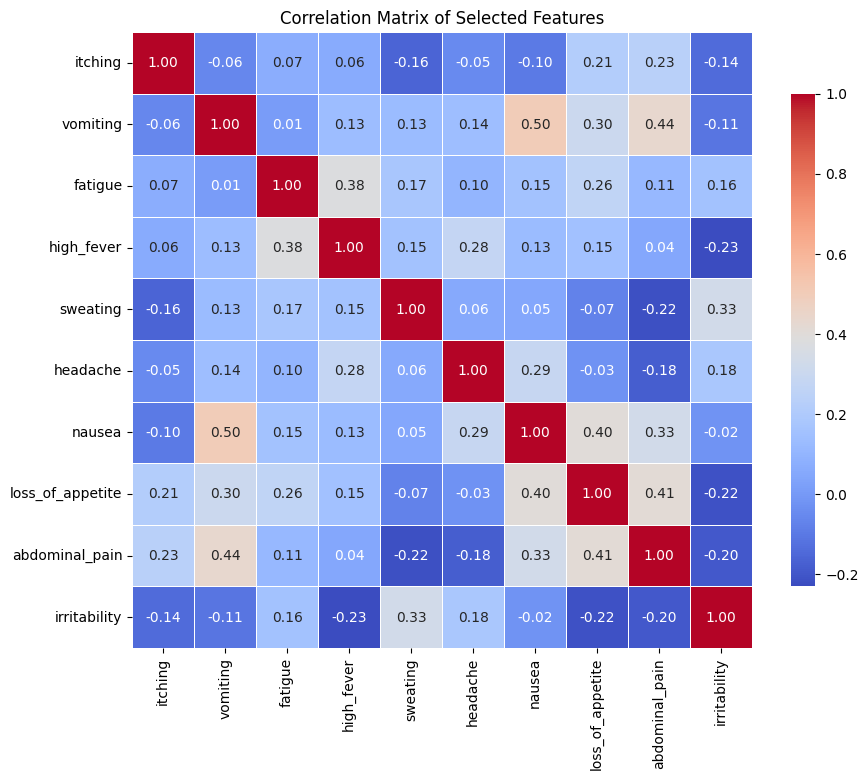

In [26]:

selected_features_data = x[selected_features]
selected_corr_matrix = selected_features_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    selected_corr_matrix,
    annot=True,  
    fmt=".2f",  
    cmap="coolwarm",
    linewidths=0.5,  
    cbar_kws={"shrink": 0.8} 
)
plt.title("Correlation Matrix of Selected Features")
plt.show()


## Hyperparameter Tuning
We use `GridSearchCV` to optimize the hyperparameters of the Random Forest model, including:
- Number of estimators
- Maximum depth of trees
- Minimum samples per split




In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")



d:\FinalYearProject-Krish\venv\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}


## Summary and Next Steps
This notebook successfully demonstrates a pipeline for disease diagnosis using machine learning models. Future improvements could include:
- Applying deep learning models.
- Incorporating additional feature engineering techniques.
- Deploying the model for real-time diagnosis.
